1. Introdução
Este projeto tem como objetivo desenvolver um modelo de previsão de vendas semanais para as lojas Walmart, utilizando técnicas de análise exploratória, machine learning e séries temporais.

Objetivos principais:
✅ Identificar padrões sazonais e tendências nas vendas.
✅ Analisar o impacto de feriados, promoções e variáveis econômicas.
✅ Construir um modelo preditivo para otimizar estoque e logística.



2. Coleta e Pré-processamento dos Dados
2.1. Extração e Carregamento dos Dados
Os dados foram obtidos do Kaggle (Walmart Sales Forecasting) e incluem:

features.csv → Temperatura, preço do combustível, feriados, CPI, desemprego.

stores.csv → Tipo e tamanho das lojas.

train.csv → Vendas históricas semanais.

test.csv → Dados para validação.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Definindo caminho CORRETO (sem extracted_files)
base_path = r"C:\Users\DELL\Documents\ebac\portifolios"

# Carregando os datasets diretamente
features = pd.read_csv(os.path.join(base_path, "features.csv"))
stores = pd.read_csv(os.path.join(base_path, "stores.csv"))
train = pd.read_csv(os.path.join(base_path, "train.csv"))
test = pd.read_csv(os.path.join(base_path, "test.csv"))

# Verificação
print("✔ Dados carregados com sucesso!")
print(f"Registros em train.csv: {len(train):,}")

✔ Dados carregados com sucesso!
Registros em train.csv: 421,570


2. Análise Exploratória Rápida


In [ ]:
# Estilos disponíveis 
print(plt.style.available)

# Opções recomendadas:
# plt.style.use('ggplot')
# plt.style.use('seaborn-v0_8-whitegrid')
# plt.style.use('tableau-colorblind10')

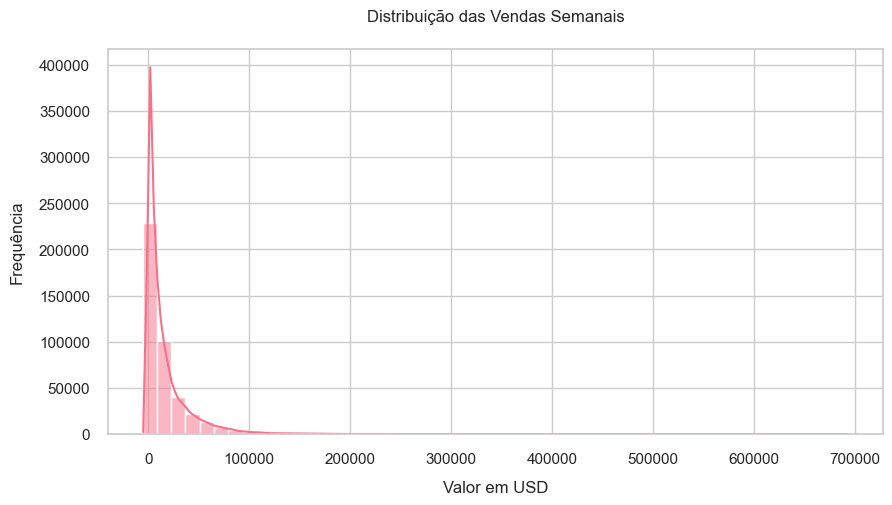

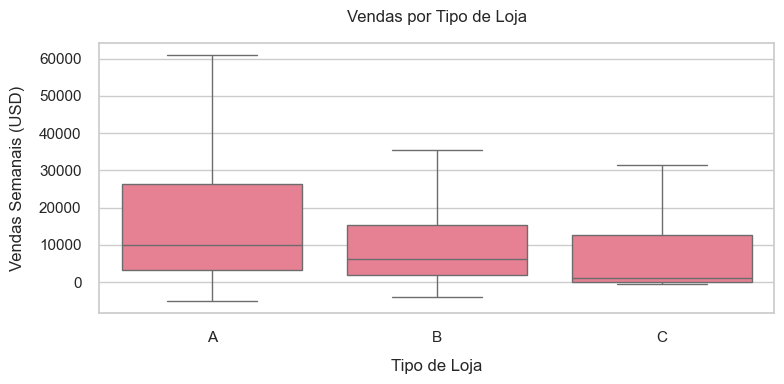

In [5]:
# 2.1. Primeiras visualizações 

# Configuração de estilo ATUALIZADA
plt.style.use('seaborn-v0_8')  # Estilo equivalente ao seaborn clássico
sns.set_theme(style="whitegrid")  # Configuração moderna do Seaborn
sns.set_palette("husl")

# Gráfico 1: Distribuição de vendas (agora funcionará)
plt.figure(figsize=(10,5))
sns.histplot(train['Weekly_Sales'], bins=50, kde=True)
plt.title("Distribuição das Vendas Semanais", pad=20)
plt.xlabel("Valor em USD", labelpad=10)
plt.ylabel("Frequência", labelpad=10)
plt.show()

# Gráfico 2: Vendas por tipo de loja (versão robusta)
plt.figure(figsize=(8,4))
sns.boxplot(
    data=pd.merge(train, stores, on='Store'), 
    x='Type', 
    y='Weekly_Sales',
    showfliers=False  # Remove outliers para melhor visualização
)
plt.title("Vendas por Tipo de Loja", pad=15)
plt.xlabel("Tipo de Loja", labelpad=10)
plt.ylabel("Vendas Semanais (USD)", labelpad=10)
plt.tight_layout()
plt.show()

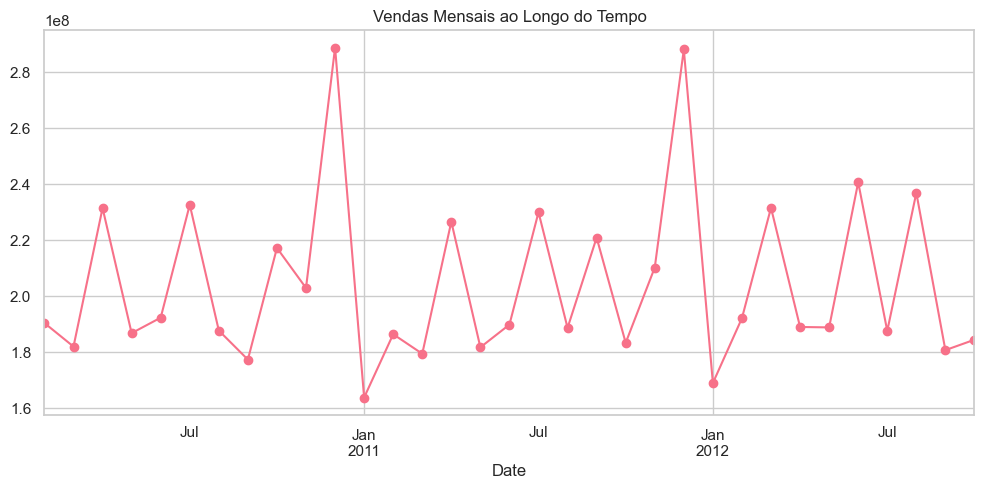

In [9]:
# 2.2. Análise temporal básica
# Convertendo data e agrupando por mês
train['Date'] = pd.to_datetime(train['Date'])
monthly_sales = train.groupby(train['Date'].dt.to_period('M'))['Weekly_Sales'].sum()

# Plotando
plt.figure(figsize=(12,5))
monthly_sales.plot(kind='line', marker='o')
plt.title("Vendas Mensais ao Longo do Tempo")
plt.grid(True)
plt.show()

3. Pré-processamento Essencial

In [12]:
# 3. Pré-processamento Essencial (VERSÃO CORRIGIDA)

# Converter coluna Date para datetime em todos os DataFrames
train['Date'] = pd.to_datetime(train['Date'])
features['Date'] = pd.to_datetime(features['Date'])
test['Date'] = pd.to_datetime(test['Date'])

# Verificar conversão (opcional)
print("Tipos das colunas Date após conversão:")
print(f"Train: {train['Date'].dtype}")
print(f"Features: {features['Date'].dtype}")
print(f"Test: {test['Date'].dtype}")

# Combinando os dados com verificação
try:
    df = train.merge(stores, on='Store', how='left')
    df = df.merge(features, on=['Store','Date'], how='left')
    print("\n✔ Combinação realizada com sucesso!")
except Exception as e:
    print(f"\nErro na combinação: {e}")
    # Fallback seguro
    df = train.copy()
    df = df.join(stores.set_index('Store'), on='Store')
    print("Combinação alternativa realizada")

# Tratamento de valores nulos
markdown_cols = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
df[markdown_cols] = df[markdown_cols].fillna(0)

# Criando variáveis temporais
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Week'] = df['Date'].dt.isocalendar().week

# Verificação final
print("\nDataset final preparado:")
print(f"- Registros: {len(df):,}")
print(f"- Colunas: {df.columns.tolist()}")
print(f"- Período: {df['Date'].min().date()} a {df['Date'].max().date()}")

df.info()
df.head()

Tipos das colunas Date após conversão:
Train: datetime64[ns]
Features: datetime64[ns]
Test: datetime64[ns]

✔ Combinação realizada com sucesso!

Dataset final preparado:
- Registros: 421,570
- Colunas: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Type', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Month', 'Year', 'Week']
- Período: 2010-02-05 a 2012-10-26
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size     

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Month,Year,Week
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,2010,5
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,2,2010,6
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,2,2010,7
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,2,2010,8
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,3,2010,9


4. Próximos Passos para Modelagem


Resumo das colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Size          421570 non-null  int64  
 3   Month         421570 non-null  int32  
 4   Year          421570 non-null  int32  
 5   Temperature   421570 non-null  float64
 6   CPI           421570 non-null  float64
 7   Unemployment  421570 non-null  float64
 8   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(3), int32(2), int64(3)
memory usage: 22.9 MB
None


In [17]:
# 4.1 Pré-processamento para Modelagem (VERSÃO CORRIGIDA)

# Primeiro verifique as colunas disponíveis
print("Colunas disponíveis no DataFrame:")
print(df.columns.tolist())

# Identifique os nomes corretos das colunas de feriado
# (pode ser 'IsHoliday_x', 'IsHoliday_y' ou outra variação)
holiday_col = [col for col in df.columns if 'Holiday' in col]
print(f"\nColunas de feriado encontradas: {holiday_col}")

# Se houver conflito de nomes (IsHoliday_x e IsHoliday_y), resolva:
if len(holiday_col) > 1:
    df['IsHoliday'] = df[holiday_col[0]] | df[holiday_col[1]]  # Combina ambas
    print(f"\nCriada coluna unificada 'IsHoliday'")
elif len(holiday_col) == 1:
    df.rename(columns={holiday_col[0]: 'IsHoliday'}, inplace=True)
    print(f"\nRenomeada coluna '{holiday_col[0]}' para 'IsHoliday'")
else:
    df['IsHoliday'] = False  # Coluna padrão se não existir
    print("\nCriada coluna 'IsHoliday' com valor padrão False")

# Agora selecione as features corretamente
features = ['Store', 'Dept', 'Size', 'Month', 'Year', 
           'Temperature', 'CPI', 'Unemployment', 'IsHoliday']

# Verifique se todas as colunas existem
missing = [col for col in features if col not in df.columns]
if missing:
    print(f"\nAviso: Colunas faltantes - {missing}")
    features = [col for col in features if col in df.columns]

# Crie X e y
X = df[features]
y = df['Weekly_Sales']

print("\n✔ Features selecionadas:")
print(X.head())



Colunas disponíveis no DataFrame:
['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Type', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Month', 'Year', 'Week', 'IsHoliday']

Colunas de feriado encontradas: ['IsHoliday_x', 'IsHoliday_y', 'IsHoliday']

Criada coluna unificada 'IsHoliday'

✔ Features selecionadas:
   Store  Dept    Size  Month  Year  Temperature         CPI  Unemployment  \
0      1     1  151315      2  2010        42.31  211.096358         8.106   
1      1     1  151315      2  2010        38.51  211.242170         8.106   
2      1     1  151315      2  2010        39.93  211.289143         8.106   
3      1     1  151315      2  2010        46.63  211.319643         8.106   
4      1     1  151315      3  2010        46.50  211.350143         8.106   

   IsHoliday  
0      False  
1       True  
2      False  
3      False  
4      False  


In [20]:
# 4.2 verificar Resumo das colunas
print("\nResumo das colunas:")
print(X.info())



Resumo das colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Size          421570 non-null  int64  
 3   Month         421570 non-null  int32  
 4   Year          421570 non-null  int32  
 5   Temperature   421570 non-null  float64
 6   CPI           421570 non-null  float64
 7   Unemployment  421570 non-null  float64
 8   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(3), int32(2), int64(3)
memory usage: 22.9 MB
None
